In [2]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('test_data.csv')

In [4]:
df.describe(include='all')

,Account_ID,Entity_ID,Seller_Type,Creditor_Name,Closure_Type,Entity_City,Entity_State,Entity_Zip,Median_Household_Income,Total_Paid,...,age_40s,age_50s,age_60s,age_70s,age_over_80,Age_range,Unemply_rate_range,Labor_force_part_range,Education_college,Education_highschool
count,1.000000e+05,1.000000e+05,100000,98943,100000,99937,99896,9.980000e+04,100000.000000,50677.000000,...,97969.000000,97969.000000,97969.000000,97969.000000,97969.000000,100000,100000,100000,100000,100000
unique,NaN,NaN,2,940,13,6701,54,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16,11,15,15,15
top,NaN,NaN,HOSPITAL,Cleveland Clinic Physician,UNPAID,HOUSTON,FL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45-49,5-6.9%,65-67.9%,15-20%,30-35%
freq,NaN,NaN,85031,6486,48941,2836,19123,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15074,26776,17021,20234,24975
mean,1.716324e+07,1.559872e+07,NaN,NaN,NaN,NaN,NaN,5.749541e+04,53990.899021,254.791452,...,12.962612,13.955967,11.131012,6.403309,3.955952,NaN,NaN,NaN,NaN,NaN
std,4.081638e+06,5.542353e+06,NaN,NaN,NaN,NaN,NaN,1.760531e+06,14639.333393,405.571014,...,2.289432,2.675529,3.241947,2.963831,2.176515,NaN,NaN,NaN,NaN,NaN
min,1.027157e+07,4.870000e+02,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2499.000000,0.180000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,1.357116e+07,1.215346e+07,NaN,NaN,NaN,NaN,NaN,3.332600e+04,45329.000000,66.580000,...,11.600000,12.400000,9.200000,4.600000,2.600000,NaN,NaN,NaN,NaN,NaN
50%,1.709626e+07,1.587995e+07,NaN,NaN,NaN,NaN,NaN,4.408900e+04,52642.333731,126.800000,...,12.900000,13.900000,11.000000,6.100000,3.600000,NaN,NaN,NaN,NaN,NaN
75%,2.078788e+07,2.006815e+07,NaN,NaN,NaN,NaN,NaN,7.507400e+04,58729.968750,291.900000,...,14.200000,15.400000,12.700000,7.500000,4.900000,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['Account_ID', 'Entity_ID', 'Seller_Type', 'Creditor_Name',
       'Closure_Type', 'Entity_City', 'Entity_State', 'Entity_Zip',
       'Median_Household_Income', 'Total_Paid', 'Number_of_payments',
       'Percent_Paid', 'Invoice_bal', 'Age', 'Target', 'Income_level',
       'Age_MedIncome', 'Invbal_MedIncome', 'Invbal_Age', 'Paid',
       'unemployment_rate', 'labor_force_participation',
       'education_highschool', 'education_college_or_above', 'home_value',
       'rent_burden', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       'age_70s', 'age_over_80', 'Age_range', 'Unemply_rate_range',
       'Labor_force_part_range', 'Education_college', 'Education_highschool'],
      dtype='object')

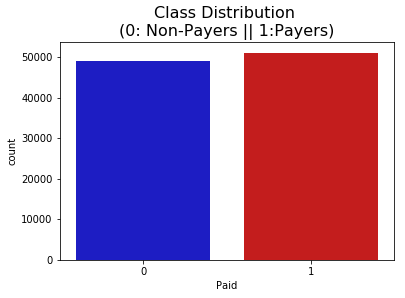

In [6]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Paid', data=df, palette=colors)
plt.title('Class Distribution \n(0: Non-Payers || 1:Payers)',fontsize=16);

In [7]:
drop_columns = ['Account_ID', 'Entity_ID',
       'Closure_Type', 'Entity_City', 'Entity_State', 'Entity_Zip',
         'Total_Paid', 'Number_of_payments',
       'Percent_Paid', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       'age_70s', 'age_over_80','Target','Creditor_Name']

In [8]:
model_data = df.drop(drop_columns, axis=1)

In [9]:
model_data.columns

Index(['Seller_Type', 'Median_Household_Income', 'Invoice_bal', 'Age',
       'Income_level', 'Age_MedIncome', 'Invbal_MedIncome', 'Invbal_Age',
       'Paid', 'unemployment_rate', 'labor_force_participation',
       'education_highschool', 'education_college_or_above', 'home_value',
       'rent_burden', 'Age_range', 'Unemply_rate_range',
       'Labor_force_part_range', 'Education_college', 'Education_highschool'],
      dtype='object')

In [10]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
Seller_Type                   100000 non-null object
Median_Household_Income       100000 non-null float64
Invoice_bal                   100000 non-null float64
Age                           100000 non-null float64
Income_level                  100000 non-null object
Age_MedIncome                 100000 non-null float64
Invbal_MedIncome              100000 non-null float64
Invbal_Age                    100000 non-null float64
Paid                          100000 non-null int64
unemployment_rate             97912 non-null float64
labor_force_participation     97969 non-null float64
education_highschool          97964 non-null float64
education_college_or_above    97964 non-null float64
home_value                    96886 non-null float64
rent_burden                   95890 non-null float64
Age_range                     100000 non-null object
Unemply_rate_range            100000 

Dropping necessary columns below.

In [11]:
target = df.Paid

In [12]:
#selecting data types "object" in order to one hot encode
categorical = model_data.loc[:, model_data.dtypes == np.object]

#converting data types to "category"
for col in categorical.columns: 
    categorical[col] = categorical[col].astype('category')

In [13]:
from sklearn.preprocessing import StandardScaler, RobustScaler

#RobustScaler is less prone to outliers 

std_scl = StandardScaler()
rob_scl = RobustScaler()

In [15]:
one_hot_cat = pd.get_dummies(categorical)

In [16]:
#selecting data types "float"
numerical = model_data.loc[:, model_data.dtypes == np.float64]

In [17]:
numerical.columns

Index(['Median_Household_Income', 'Invoice_bal', 'Age', 'Age_MedIncome',
       'Invbal_MedIncome', 'Invbal_Age', 'unemployment_rate',
       'labor_force_participation', 'education_highschool',
       'education_college_or_above', 'home_value', 'rent_burden'],
      dtype='object')

In [18]:
numerical['scl_Median_Household_Income'] = rob_scl.fit_transform(numerical.Median_Household_Income.values.reshape(-1,1))
numerical['scl_Invoice_bal'] = rob_scl.fit_transform(numerical.Invoice_bal.values.reshape(-1,1))
numerical['scl_Age'] = rob_scl.fit_transform(numerical.Age.values.reshape(-1,1))
numerical['scl_Age_MedIncome'] = rob_scl.fit_transform(numerical.Age_MedIncome.values.reshape(-1,1))
numerical['scl_Unemployment_rate'] = rob_scl.fit_transform(numerical.unemployment_rate.values.reshape(-1,1))
numerical['scl_Labor_force_participation'] = rob_scl.fit_transform(numerical.labor_force_participation.values.reshape(-1,1))
numerical['scl_Education_Highschool'] = rob_scl.fit_transform(numerical.education_highschool.values.reshape(-1,1))
numerical['scl_Education_College'] = rob_scl.fit_transform(numerical.education_college_or_above.values.reshape(-1,1))
numerical['scl_Home_value'] = rob_scl.fit_transform(numerical.home_value.values.reshape(-1,1))
numerical['scl_Rent_burden'] = rob_scl.fit_transform(numerical.rent_burden.values.reshape(-1,1))

In [19]:
num_drop = ['Median_Household_Income', 'Invoice_bal', 'Age', 'Age_MedIncome',
       'Invbal_MedIncome', 'Invbal_Age', 'unemployment_rate',
       'labor_force_participation', 'education_highschool',
       'education_college_or_above', 'home_value', 'rent_burden']

scaled_num = numerical.drop(num_drop, axis=1)
scaled_num.columns

Index(['scl_Median_Household_Income', 'scl_Invoice_bal', 'scl_Age',
       'scl_Age_MedIncome', 'scl_Unemployment_rate',
       'scl_Labor_force_participation', 'scl_Education_Highschool',
       'scl_Education_College', 'scl_Home_value', 'scl_Rent_burden'],
      dtype='object')

In [20]:
#combining numerical and categorical features into one dataset to scale
predictors = pd.concat([scaled_num, one_hot_cat], axis=1, join_axes=[numerical.index])
#filling NaNs with 0s
predictors.fillna(0, inplace=True)

In [21]:
#combining numerical and categorical features into one dataset to scale
new_df = pd.concat([predictors, df.Paid], axis=1, join_axes=[predictors.index])

new_df.head()

,scl_Median_Household_Income,scl_Invoice_bal,scl_Age,scl_Age_MedIncome,scl_Unemployment_rate,scl_Labor_force_participation,scl_Education_Highschool,scl_Education_College,scl_Home_value,scl_Rent_burden,...,Education_highschool_35-40%,Education_highschool_40-45%,Education_highschool_45-50%,Education_highschool_5-10%,Education_highschool_50-55%,Education_highschool_55-60%,Education_highschool_60-65%,Education_highschool_65-70%,Education_highschool_70%+,Paid
0,-0.252469,-0.134078,-0.357030,-0.337662,1.227273,0.313725,0.000000,-0.188889,-0.365247,1.463158,...,0,0,0,0,0,0,0,0,0,1
1,0.000000,-0.283054,0.915698,0.844074,0.500000,-0.784314,0.036036,0.155556,-0.111454,1.368421,...,0,0,0,0,0,0,0,0,0,1
2,0.000000,7.165736,0.052061,0.111156,-0.272727,0.088235,0.126126,-0.238889,-0.481957,-0.578947,...,0,0,0,0,0,0,0,0,0,1
3,0.792038,-0.283054,0.961152,1.427085,-0.704545,0.107843,-0.792793,1.255556,2.345534,-0.189474,...,0,0,0,0,0,0,0,0,0,1
4,4.008641,1.684916,-0.947939,0.364708,-0.977273,-0.019608,-0.936937,1.894444,4.836299,-0.894737,...,0,0,0,0,0,0,0,0,0,1


In [22]:
new_df.shape

(100000, 93)

# Splitting the Data (Original DataFrame) 

Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. **Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques.** The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('Non-Payers', round(new_df['Paid'].value_counts()[0]/len(new_df) * 100,2), '% of the dataset')
print('Payers', round(new_df['Paid'].value_counts()[1]/len(new_df) * 100,2), '% of the dataset')

X = new_df.drop('Paid', axis=1)
y = new_df['Paid']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Non-Payers 48.94 % of the dataset
Payers 51.06 % of the dataset
Train: [10212 10213 10214 ... 99997 99998 99999] Test: [    0     1     2 ... 60000 60001 60002]
Train: [    0     1     2 ... 99997 99998 99999] Test: [10212 10213 10214 ... 69990 69991 69992]
Train: [    0     1     2 ... 99997 99998 99999] Test: [20424 20425 20426 ... 79980 79981 79982]
Train: [    0     1     2 ... 99997 99998 99999] Test: [30636 30637 30638 ... 89996 89997 89998]
Train: [    0     1     2 ... 89996 89997 89998] Test: [40848 40849 40850 ... 99997 99998 99999]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.48940638 0.51059362]
[0.48942447 0.51057553]


# Random Under-sampling: 



In [24]:
new_df = new_df.sample(frac=1)

payers = new_df.loc[new_df.Paid ==1]
nonpayers = new_df.loc[new_df.Paid == 0] 

norm_dist_df = pd.concat([payers, nonpayers])

data = norm_dist_df.sample(frac=1, random_state=42)

data.head()

,scl_Median_Household_Income,scl_Invoice_bal,scl_Age,scl_Age_MedIncome,scl_Unemployment_rate,scl_Labor_force_participation,scl_Education_Highschool,scl_Education_College,scl_Home_value,scl_Rent_burden,...,Education_highschool_35-40%,Education_highschool_40-45%,Education_highschool_45-50%,Education_highschool_5-10%,Education_highschool_50-55%,Education_highschool_55-60%,Education_highschool_60-65%,Education_highschool_65-70%,Education_highschool_70%+,Paid
58259,0.278406,-0.208566,0.006607,0.206543,-0.431818,-0.049020,-0.171171,-0.988889,-0.476409,0.894737,...,0,0,0,0,0,0,0,0,0,0
51033,-0.810824,-0.086525,0.097516,-0.256338,-0.090909,0.303922,0.468468,0.027778,-0.332444,-0.389474,...,1,0,0,0,0,0,0,0,0,0
31961,-0.055360,-0.283054,-0.766120,-0.600583,0.045455,0.333333,0.000000,0.055556,0.039886,-0.484211,...,0,0,0,0,0,0,0,0,0,1
69136,-1.576329,1.976194,0.642970,-0.362565,0.772727,-3.676471,0.009009,-0.722222,-0.638843,0.242105,...,0,0,0,0,0,0,0,0,0,0
60220,-0.394132,0.226443,0.000000,-0.122107,0.159091,0.088235,0.027027,0.294444,0.334405,-0.084211,...,0,0,0,0,0,0,0,0,0,0


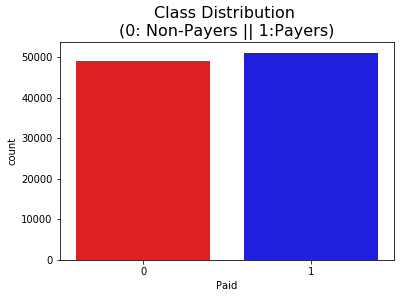

In [89]:
colors = ["red", "blue"]

sns.countplot('Paid', data=data, palette=colors)
plt.title('Class Distribution \n(0: Non-Payers || 1:Payers)',fontsize=16);

### Correlation Matrices 
We want to know if there are any features that influence heavily. 

### Summary and Explanation: 
- 

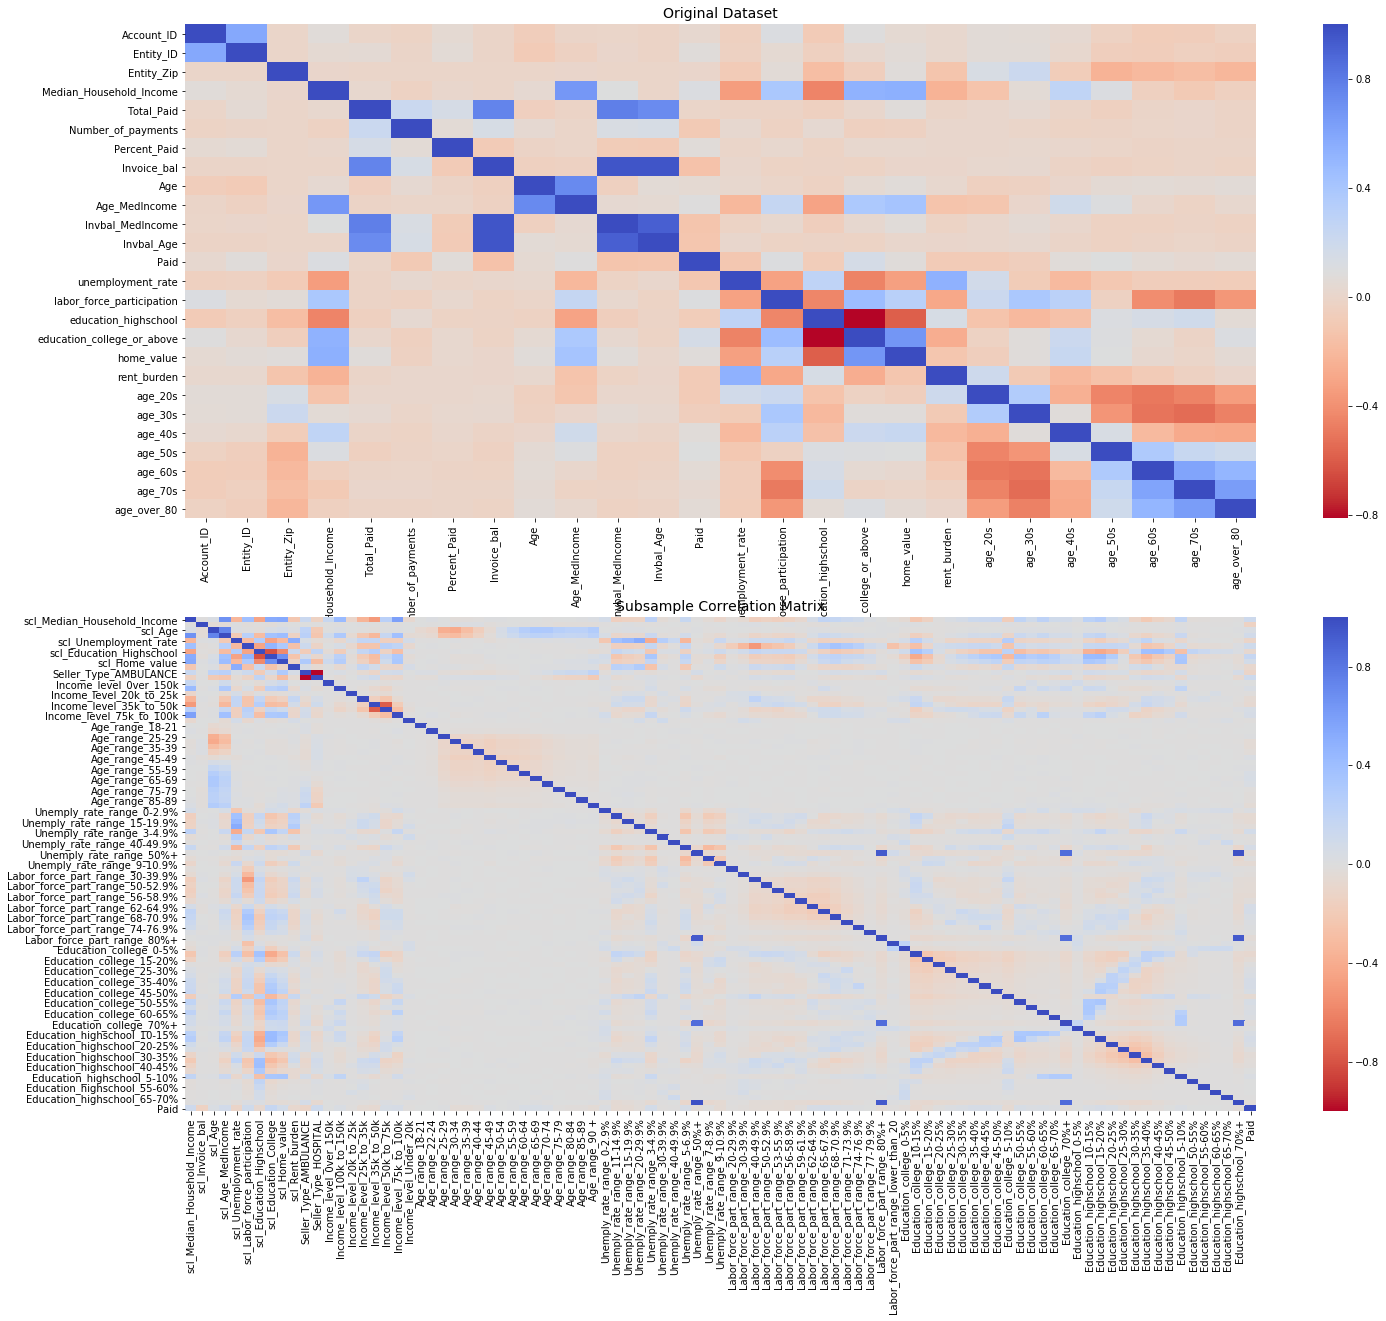

In [26]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

#Entire df 
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r' , annot_kws={'size':20}, ax=ax1)
ax1.set_title('Original Dataset', fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r' , annot_kws={'size':20}, ax=ax2)
ax2.set_title('Subsample Correlation Matrix', fontsize=14)

plt.show()

['scl_Median_Household_Income', 'scl_Invoice_bal', 'scl_Age',
       'scl_Age_MedIncome', 'scl_Unemployment_rate',
       'scl_Labor_force_participation', 'scl_Education_Highschool',
       'scl_Education_College', 'scl_Home_value', 'scl_Rent_burden',
       'Seller_Type_AMBULANCE', 'Seller_Type_HOSPITAL',.columns

AttributeError: 'numpy.ndarray' object has no attribute 'boxplot'

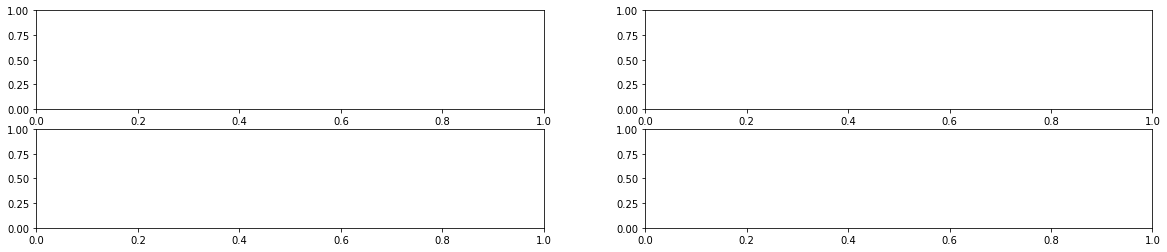

In [92]:
f, axes = plt.subplots(ncols=2, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a Payer)
sns.boxplot(x="Paid", y="scl_Median_Household_Income", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('Median Household Income vs Class Correlation')

sns.boxplot(x="Paid", y="scl_Age", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('Age vs Class Correlation')


sns.boxplot(x="Paid", y="scl_Education_Highschool", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('Education vs Class Correlation')


sns.boxplot(x="Paid", y="scl_Rent_burden", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('Rent vs Class Correlation')

plt.show()

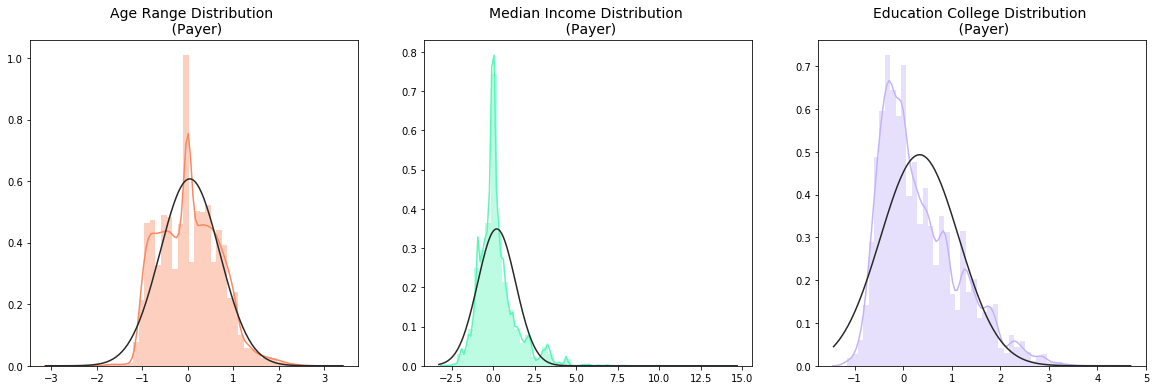

In [28]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

scl_age_payer_dist = new_df['scl_Age'].loc[new_df['Paid'] == 1].values
sns.distplot(scl_age_payer_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Age Range Distribution \n (Payer)', fontsize=14)

scl_income_dist = new_df['scl_Median_Household_Income'].loc[new_df['Paid'] == 1].values
sns.distplot(scl_income_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Median Income Distribution \n (Payer)', fontsize=14)


scl_college_dist = new_df['scl_Education_College'].loc[new_df['Paid'] == 1].values
sns.distplot(scl_college_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('Education College Distribution \n (Payer)', fontsize=14)

plt.show()

# Dimensionality Reduction and Clustering 

**Understanding t-SNE:**

In order to understand this algorithm you have to understand the following terms: 
- Euclidean Distance
- Conditional Probability 
- Normal and T-Distribution Plots

In [29]:
small_df = data.sample(5000, random_state=52)
small_df.Paid.value_counts(normalize=True)

1    0.5044
0    0.4956
Name: Paid, dtype: float64

In [30]:
small_df.shape

(5000, 93)

In [31]:
X = small_df.drop('Paid', axis=1)
y = small_df.Paid


#t-SNE implementation
t0 = time.time()
x_reduced_tsne = TSNE(n_components=2, random_state=123).fit_transform(X.values) 
t1 = time.time()
print('t-SNE took {:.2} s'.format(t1 - t0))


# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))


# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

t-SNE took 5.7e+01 s
PCA took 0.047 s
Truncated SVD took 0.012 s


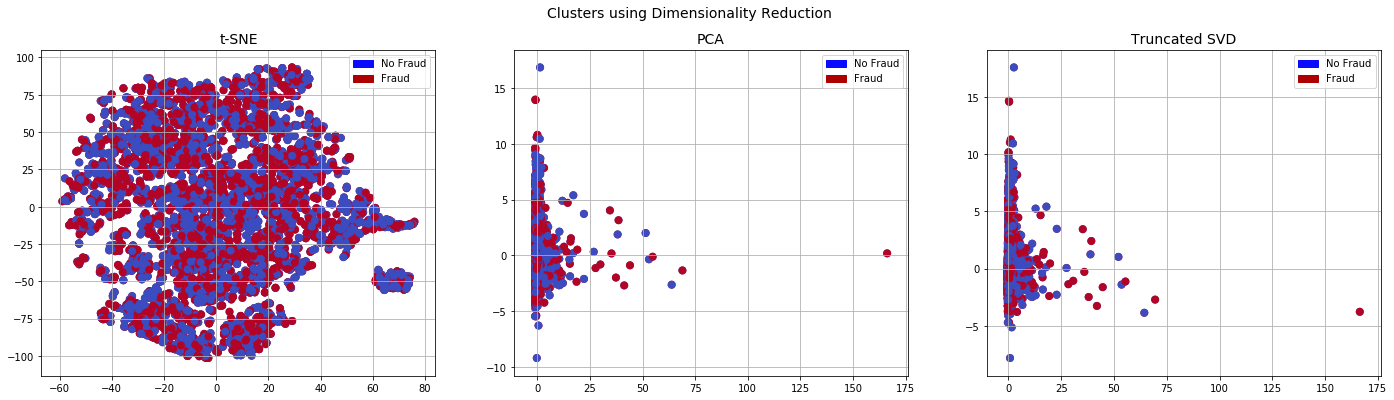

In [88]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(x_reduced_tsne[:,0], x_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Non-Payer', linewidths=2)
ax1.scatter(x_reduced_tsne[:,0], x_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Payer', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Non-Payer', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Payer', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Non-Payer', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Payer', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.savefig('img_dim_redct_50_50.png')

plt.show()

# Classifiers (UnderSampling):

In [34]:
data_split = data.reset_index()
data_split.drop('index', axis=1, inplace=True)
data_train = data_split.loc[0:49999]
data_test = data_split.loc[49999:100000]

print('Train')
print(data_train.shape)
print(data_train.Paid.value_counts(normalize=True))
print('\n')
print('Test')
print(data_test.shape)
print(data_test.Paid.value_counts(normalize=True))

Train
(50000, 93)
1    0.51108
0    0.48892
Name: Paid, dtype: float64


Test
(50001, 93)
1    0.51009
0    0.48991
Name: Paid, dtype: float64


In [35]:
subset_train = data_train.sample(5000, random_state=42)

In [36]:
X = subset_train.drop('Paid', axis=1)
y = subset_train.Paid

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [38]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [39]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [40]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 63.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 59.0 % accuracy score
Classifiers:  SVC Has a training score of 63.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 60.0 % accuracy score


In [41]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
forest_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1)), "max_features":['auto'], 'n_estimators': [1, 10, 100, 200, 300]}
grid_tree = GridSearchCV(RandomForestClassifier(), forest_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [42]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('RandomForest Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  62.52%
Knears Neighbors Cross Validation Score 56.93%
Support Vector Classifier Cross Validation Score 62.42%
RandomForest Classifier Cross Validation Score 60.47%


In [43]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Random Forest Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

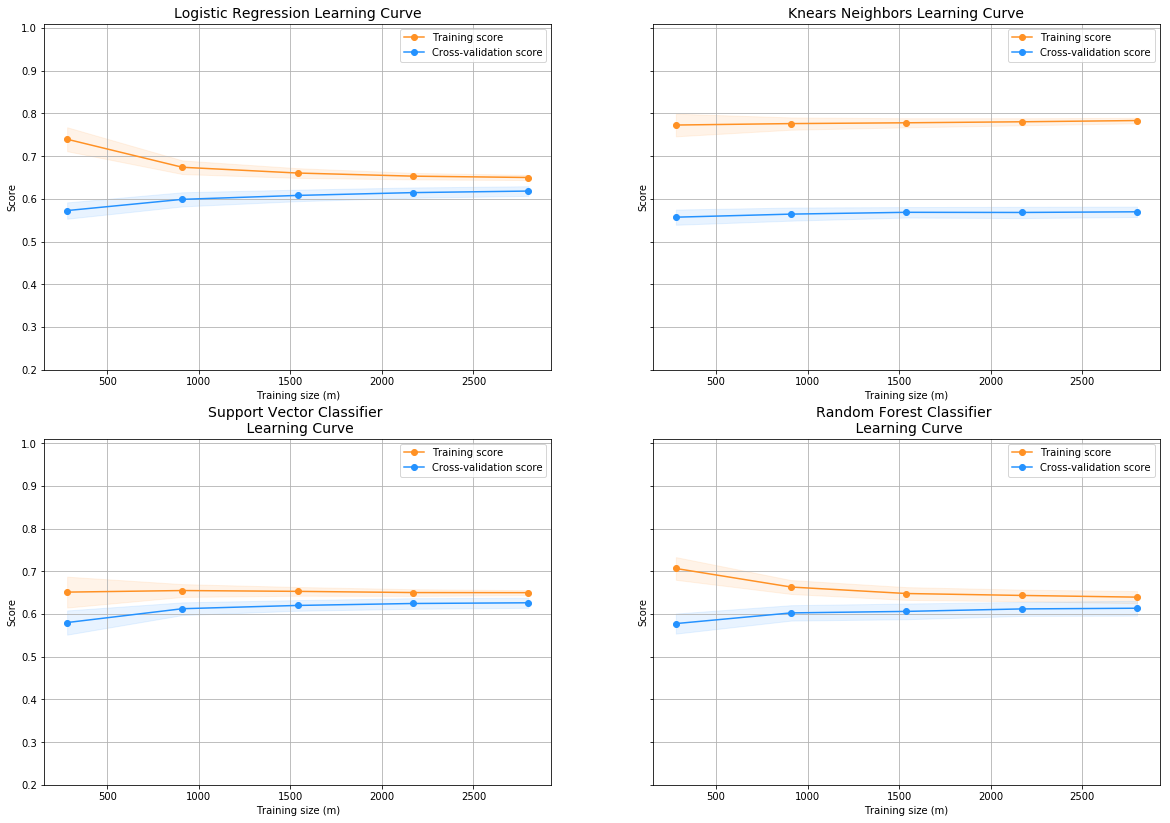

In [87]:
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.2, 1.01), cv=cv, n_jobs=4)

plt.savefig('img_learning_curve50_50.png')

plt.show()

In [45]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [46]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.6625603663644881
KNears Neighbors:  0.5693400994162179
Support Vector Classifier:  0.6759552804521854
Decision Tree Classifier:  0.6262620467100722


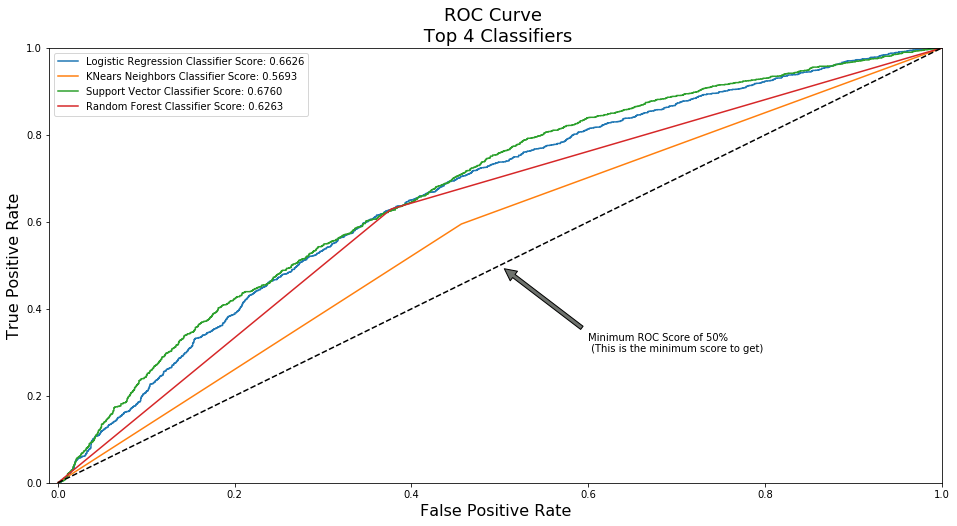

In [86]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)

plt.savefig('img_ROC_curve50_50.png')

plt.show()

### A deeper look into LogisticRegression 

Terms:
- True Positives: Correctly Classified Payers
- False Positives: Incorrectly Classified Payers
- True Negative: Correctly Classified Non-Payers
- False Negative: Incorrectly Classified Non-Payers
- Precision: True Positives/(True Positives + False Positives)
- Recall: True Positives/(True Positives + False Negatives)
- Precision as the name says, says how precise (how sure) is our model in detecting Payers while recall is the amount of Payers our model is able to detect.
- Precision/Recall Tradeoff: The more precise (selective) our model is, the less cases it will detect. Example: Assuming that our model has a precision of 95%, Let's say there are only 5 fraud cases in which the model is 95% precise or more that these are fraud cases. Then let's say there are 5 more cases that our model considers 90% to be a fraud case, if we lower the precision there are more cases that our model will be able to detect.

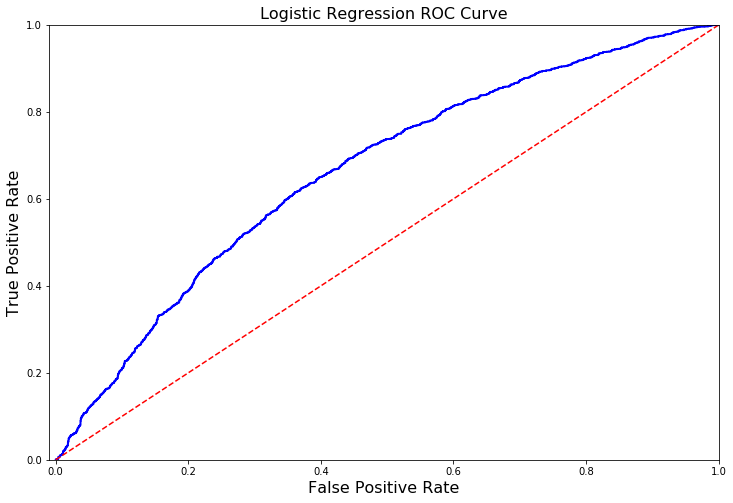

In [48]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [49]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [50]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.67
Precision Score: 0.64
F1 Score: 0.65
Accuracy Score: 0.65
---------------------------------------------------------------------------------------------------------------------------------------


In [51]:
print('Predict Results\n----------------------\n')
print('LogisticRegression:')
print(classification_report(y_test, log_reg.predict(X_test)))

print('\n')
print('RandomForest:')
print(classification_report(y_test, tree_clf.predict(X_test)))


Predict Results
----------------------

LogisticRegression:
              precision    recall  f1-score   support

           0       0.62      0.59      0.60       482
           1       0.63      0.66      0.65       518

   micro avg       0.63      0.63      0.63      1000
   macro avg       0.63      0.62      0.62      1000
weighted avg       0.63      0.63      0.63      1000



RandomForest:
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       482
           1       0.61      0.59      0.60       518

   micro avg       0.59      0.59      0.59      1000
   macro avg       0.59      0.60      0.59      1000
weighted avg       0.60      0.59      0.60      1000



In [52]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

rf.fit(X_train, y_train);

rf_imp = rf.feature_importances_


In [54]:
rf_list = []

for name, importance in zip(predictors, 100*(rf_imp/ rf_imp.max())):
    print(name, '=', importance)
    rf_list.append(importance)

scl_Median_Household_Income = 19.543526623466693
scl_Invoice_bal = 100.0
scl_Age = 25.037837401581154
scl_Age_MedIncome = 33.92051286428298
scl_Unemployment_rate = 19.734013197977916
scl_Labor_force_participation = 31.086254552827768
scl_Education_Highschool = 13.761272591422486
scl_Education_College = 36.66380468318574
scl_Home_value = 35.2489577216898
scl_Rent_burden = 12.712138218118065
Seller_Type_AMBULANCE = 36.12234055315982
Seller_Type_HOSPITAL = 34.29553452123141
Income_level_0ver_150k = 0.0
Income_level_100k_to_150k = 0.3613880092545832
Income_level_20k_to_25k = 0.0
Income_level_25k_to_35k = 0.8890477169156369
Income_level_35k_to_50k = 3.8762721151879864
Income_level_50k_to_75k = 1.9400159088013194
Income_level_75k_to_100k = 0.8371152619979838
Income_level_Under_20k = 0.0
Age_range_18-21 = 0.0
Age_range_22-24 = 0.0
Age_range_25-29 = 1.1705764384646553
Age_range_30-34 = 6.088341270456878
Age_range_35-39 = 2.4052177913045045
Age_range_40-44 = 0.12948715794123652
Age_range_45-49 

# SMOTE Technique (over-sampling) 

- Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
- Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.
- Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.
- Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.


In [55]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()



rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 80001 | Length of y (train): 80001
Length of X (test): 19999 | Length of y (test): 19999
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.6417419868818046
precision: 0.6446015033141039
recall: 0.6650021328804765
f1: 0.6546313346777811
---------------------------------------------------------------------------------------------------------------------------------------


In [56]:
labels = ['Non-Payers', 'Payers']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

  Non-Payers       0.62      0.62      0.62      9788
      Payers       0.64      0.63      0.64     10211

   micro avg       0.63      0.63      0.63     19999
   macro avg       0.63      0.63      0.63     19999
weighted avg       0.63      0.63      0.63     19999



In [57]:
y_score = best_est.decision_function(original_Xtest)

In [58]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.66


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.66')

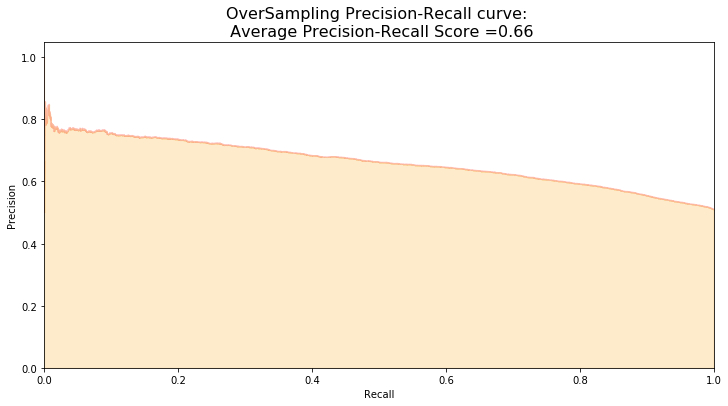

In [59]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [60]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(ratio='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)

In [61]:
# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :0.7607038021087646 sec


# Test Data with LogisticRegression: 

**Confusion Matrix:**
- Positive/Negative: Type of Class (label) ["No", "Yes"] True/False: Correctly or Incorrectly classified by the model.
- True Negatives (Top-Left Square): This is the number of correctly classifications of the "No" (No Fraud Detected) class. 
- False Negatives (Top-Right Square): This is the number of incorrectly classifications of the "No"(No Fraud Detected) class. 
- False Positives (Bottom-Left Square): This is the number of incorrectly classifications of the "Yes" (Fraud Detected) class 
- True Positives (Bottom-Right Square): This is the number of correctly classifications of the "Yes" (Fraud Detected) class.

**Summary:**

Random UnderSampling: We will evaluate the final performance of the classification models in the random undersampling subset. Keep in mind that this is not the data from the original dataframe.
Classification Models: The models that performed the best were logistic regression and support vector classifier (SVM)

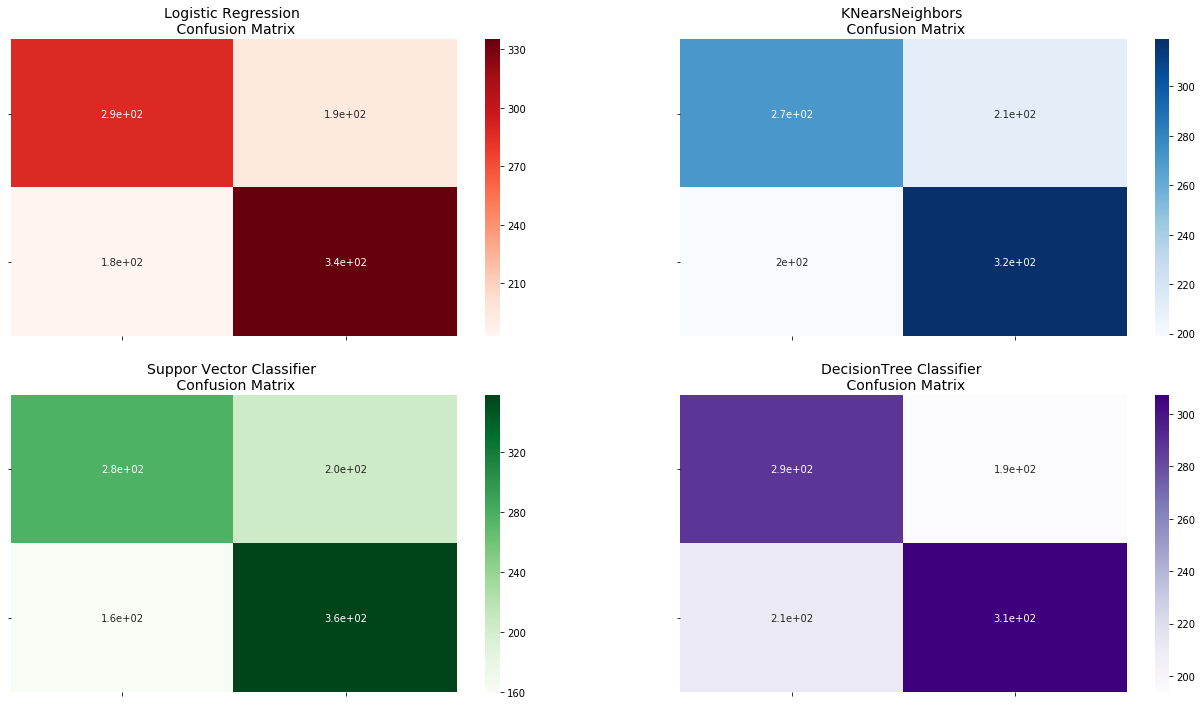

In [85]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.Reds)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.Blues)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.Greens)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.Purples)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.savefig('img_conf_mtrx_50_50models.png')

plt.show()

In [93]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Random Forest Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.61      0.60      0.60       482
           1       0.63      0.65      0.64       518

   micro avg       0.62      0.62      0.62      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.62      0.62      0.62      1000

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.58      0.56      0.57       482
           1       0.60      0.62      0.61       518

   micro avg       0.59      0.59      0.59      1000
   macro avg       0.59      0.59      0.59      1000
weighted avg       0.59      0.59      0.59      1000

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.63      0.57      0.60       482
           1       0.64      0.69      0.66       518

   micro avg       0.64      0.64      0.64      1000
   macro avg       0.63      0.63      0.63      1000
weighted

In [64]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Technique,Score
0,Random UnderSampling,0.623000
1,Oversampling (SMOTE),0.628981


# Neural Networks 

In this section we will implement a simple Neural Network in order to see which of the two logistic regressions models we implemented in the (undersample or oversample(SMOTE)) has a better accuracy for detecting payers and non-payers.

## Random Undersampling 
---

In [159]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(46, activation='relu'),
    Dense(46, activation='relu'),
    Dense(2, activation='sigmoid')
])

In [160]:
undersample_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 92)                8556      
_________________________________________________________________
dense_47 (Dense)             (None, 46)                4278      
_________________________________________________________________
dense_48 (Dense)             (None, 46)                2162      
_________________________________________________________________
dense_49 (Dense)             (None, 2)                 94        
Total params: 15,090
Trainable params: 15,090
Non-trainable params: 0
_________________________________________________________________


In [161]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [162]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=100, epochs=30, shuffle=True, verbose=2)

Train on 3200 samples, validate on 800 samples
Epoch 1/30
 - 1s - loss: 0.6840 - acc: 0.5562 - val_loss: 0.6480 - val_acc: 0.6350
Epoch 2/30
 - 0s - loss: 0.6582 - acc: 0.6197 - val_loss: 0.6296 - val_acc: 0.6663
Epoch 3/30
 - 0s - loss: 0.6436 - acc: 0.6422 - val_loss: 0.6230 - val_acc: 0.6563
Epoch 4/30
 - 0s - loss: 0.6323 - acc: 0.6516 - val_loss: 0.6176 - val_acc: 0.6700
Epoch 5/30
 - 0s - loss: 0.6219 - acc: 0.6522 - val_loss: 0.6189 - val_acc: 0.6638
Epoch 6/30
 - 0s - loss: 0.6126 - acc: 0.6678 - val_loss: 0.6191 - val_acc: 0.6463
Epoch 7/30
 - 0s - loss: 0.5996 - acc: 0.6838 - val_loss: 0.6206 - val_acc: 0.6563
Epoch 8/30
 - 0s - loss: 0.5865 - acc: 0.6869 - val_loss: 0.6244 - val_acc: 0.6463
Epoch 9/30
 - 0s - loss: 0.5704 - acc: 0.7141 - val_loss: 0.6383 - val_acc: 0.6450
Epoch 10/30
 - 0s - loss: 0.5568 - acc: 0.7228 - val_loss: 0.6554 - val_acc: 0.6312
Epoch 11/30
 - 0s - loss: 0.5294 - acc: 0.7363 - val_loss: 0.6577 - val_acc: 0.6312
Epoch 12/30
 - 0s - loss: 0.5092 - acc

In [163]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [164]:
undersample_payer_predictions = undersample_model.predict_classes(original_Xtest, batch_size=200, verbose=0)

In [166]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[6487 3301]
 [5058 5153]]
Confusion matrix, without normalization
[[ 9788     0]
 [    0 10211]]


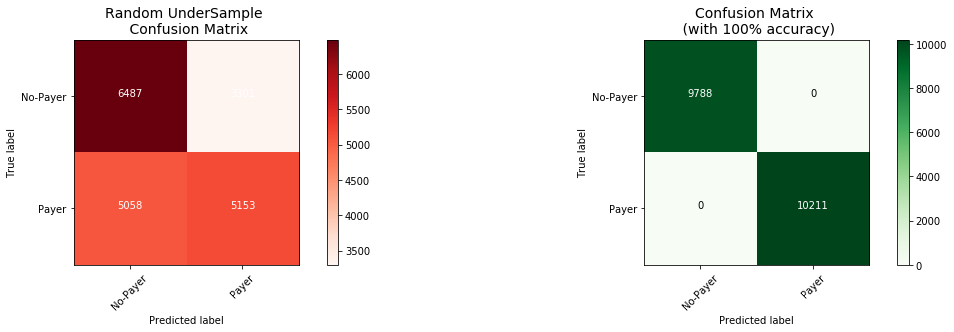

In [167]:
undersample_cm = confusion_matrix(original_ytest, undersample_payer_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No-Payer', 'Payer']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

plt.savefig('img_neural_mtrx50_50.png')

plt.show()

## SMOTE
---

In [168]:
n_inputs = Xsm_train.shape[1]

smote_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(46, activation='relu'),
    Dense(46, activation='relu'),
    Dense(2, activation='sigmoid')
])

In [170]:
smote_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [171]:
smote_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Train on 65356 samples, validate on 16340 samples
Epoch 1/20
 - 1s - loss: 0.6098 - acc: 0.6749 - val_loss: 0.8531 - val_acc: 0.4234
Epoch 2/20
 - 1s - loss: 0.5975 - acc: 0.6884 - val_loss: 0.8660 - val_acc: 0.3976
Epoch 3/20
 - 1s - loss: 0.5945 - acc: 0.6901 - val_loss: 0.9269 - val_acc: 0.3758
Epoch 4/20
 - 1s - loss: 0.5913 - acc: 0.6920 - val_loss: 0.8633 - val_acc: 0.4201
Epoch 5/20
 - 1s - loss: 0.5884 - acc: 0.6946 - val_loss: 0.9045 - val_acc: 0.3779
Epoch 6/20
 - 1s - loss: 0.5859 - acc: 0.6956 - val_loss: 0.8991 - val_acc: 0.3992
Epoch 7/20
 - 1s - loss: 0.5823 - acc: 0.6977 - val_loss: 0.8523 - val_acc: 0.4502
Epoch 8/20
 - 1s - loss: 0.5795 - acc: 0.7006 - val_loss: 0.8679 - val_acc: 0.4311
Epoch 9/20
 - 1s - loss: 0.5760 - acc: 0.7022 - val_loss: 0.8675 - val_acc: 0.4266
Epoch 10/20
 - 1s - loss: 0.5727 - acc: 0.7060 - val_loss: 0.8166 - val_acc: 0.4547
Epoch 11/20
 - 1s - loss: 0.5691 - acc: 0.7076 - val_loss: 0.8820 - val_acc: 0.4493
Epoch 12/20
 - 1s - loss: 0.5653 - 

In [172]:
smote_predictions = smote_model.predict(original_Xtest, batch_size=200, verbose=0)


In [173]:
smote_payer_predictions = smote_model.predict_classes(original_Xtest, batch_size=200, verbose=0)

Confusion matrix, without normalization
[[3880 5908]
 [1743 8468]]
Confusion matrix, without normalization
[[ 9788     0]
 [    0 10211]]


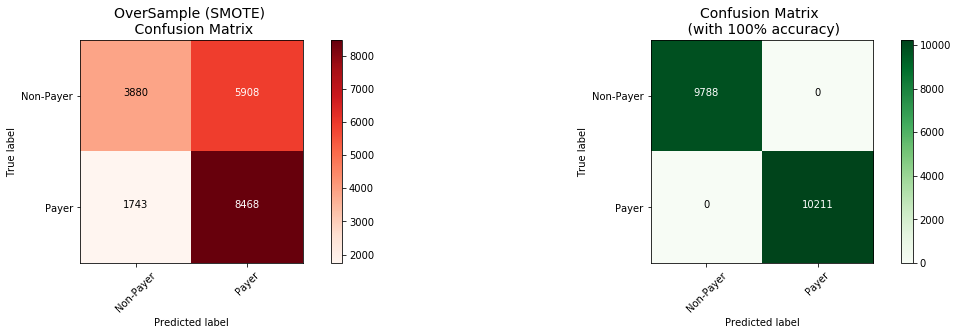

In [175]:
oversample_smote = confusion_matrix(original_ytest, smote_payer_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['Non-Payer', 'Payer']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

plt.savefig('img_neural_mtrx_SMOTE.png')

plt.show()
